# Ticket Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import data_preprocessor
from datetime import datetime
import seaborn as sns
# import analysis

In [10]:
fname_processed = 'data/khi_tickets_2022/khi_tickets_2022_unique.csv'
df_ticket_data = data_preprocessor.load_corpus(fname_processed , pandas = True, header = True)
print(df_ticket_data.columns)

Index(['Ticket#', 'Title', 'Created', 'Close Time', 'Queue', 'Customer User',
       'Address'],
      dtype='object')


In [12]:
def ticket_duration_hours(row):
    format_str = '%Y-%m-%d %H:%M:%S' 

    start_time = datetime.strptime(row['Created'], format_str)
    end_time = datetime.strptime(row['Close Time'], format_str)

    duration = end_time - start_time

    total_hours = duration.total_seconds() / 3600

    return total_hours

In [13]:
fname = 'data/khi_tickets_2022/normalized_khi_tickets_2022_run8.csv'
df = data_preprocessor.load_corpus(fname, pandas = True, header = True)
df.head()

,Ticket #,Type,House #,Apartment #,Building #,Building Name,Street,Road,Area & Sub Area,Neighbourhood,City
0,105207394681,apartment,house # sc - 4,flat # 107 1st floor,NaN,al kareem centre,faizan street,NaN,block d,north nazimabad,karachi
1,109247984771,apartment,house # plot # 28 - c,flat a - 2 1st floor,NaN,NaN,lane 9,khayaban e sehar,phase 6,defence,karachi
2,101042042052,apartment,NaN,apartment / suite # flat 204,building all blocks,pardesi green land apartments,8th street,NaN,bath island,clifton,karachi
3,101087613080,apartment,NaN,apartment / suite # bi3,building all blocks,ibrahim terrace,NaN,adam road,civil lines,clifton,karachi
4,107178824611,apartment,NaN,apartment / suite # 26,building block b,marhaba galaxy,NaN,akhtar masood road,block m,north nazimabad,karachi


In [14]:
df['Ticket Duration (hours)'] = df_ticket_data.apply(ticket_duration_hours, axis=1)

df.head()

,Ticket #,Type,House #,Apartment #,Building #,Building Name,Street,Road,Area & Sub Area,Neighbourhood,City,Ticket Duration (hours)
0,105207394681,apartment,house # sc - 4,flat # 107 1st floor,NaN,al kareem centre,faizan street,NaN,block d,north nazimabad,karachi,122.830278
1,109247984771,apartment,house # plot # 28 - c,flat a - 2 1st floor,NaN,NaN,lane 9,khayaban e sehar,phase 6,defence,karachi,8.279722
2,101042042052,apartment,NaN,apartment / suite # flat 204,building all blocks,pardesi green land apartments,8th street,NaN,bath island,clifton,karachi,19.714722
3,101087613080,apartment,NaN,apartment / suite # bi3,building all blocks,ibrahim terrace,NaN,adam road,civil lines,clifton,karachi,21.246389
4,107178824611,apartment,NaN,apartment / suite # 26,building block b,marhaba galaxy,NaN,akhtar masood road,block m,north nazimabad,karachi,22.580278


## General Analysis 

### Ticket #, Neighbourhood, Ticket Duration (hours), Type (house or apartment)

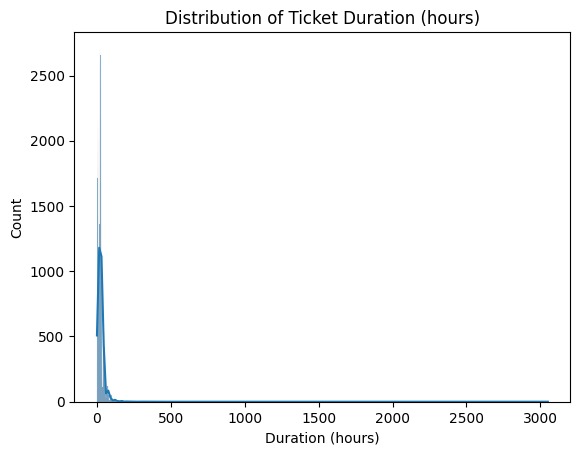

In [15]:
# Distribution of ticket duration: This will show how much time is generally spent on tickets.

sns.histplot(df['Ticket Duration (hours)'], kde=True)
plt.title('Distribution of Ticket Duration (hours)')
plt.xlabel('Duration (hours)')
plt.show()

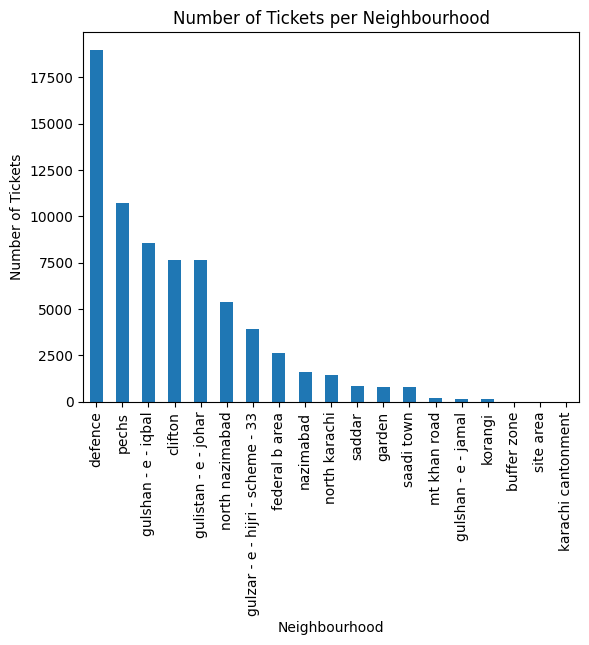

In [16]:
# Number of tickets per neighbourhood: This can show which neighbourhoods are reporting more issues

df['Neighbourhood'].value_counts().plot(kind='bar')
plt.title('Number of Tickets per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Tickets')
plt.show()

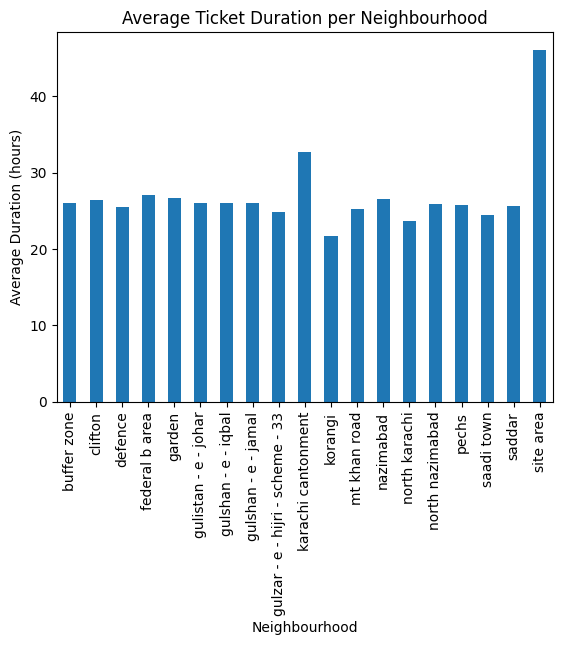

In [17]:
# Average ticket duration per neighbourhood: This can show which neighbourhoods' issues are taking longer to resolve.

df.groupby('Neighbourhood')['Ticket Duration (hours)'].mean().plot(kind='bar')
plt.title('Average Ticket Duration per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Duration (hours)')
plt.show()


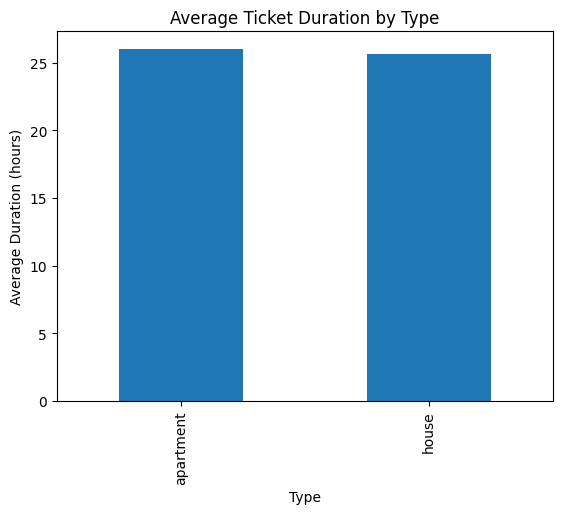

In [18]:
# Average ticket duration by type (house or apartment): This can show if there's a difference in resolution time between houses and apartments.

df.groupby('Type')['Ticket Duration (hours)'].mean().plot(kind='bar')
plt.title('Average Ticket Duration by Type')
plt.xlabel('Type')
plt.ylabel('Average Duration (hours)')
plt.show()


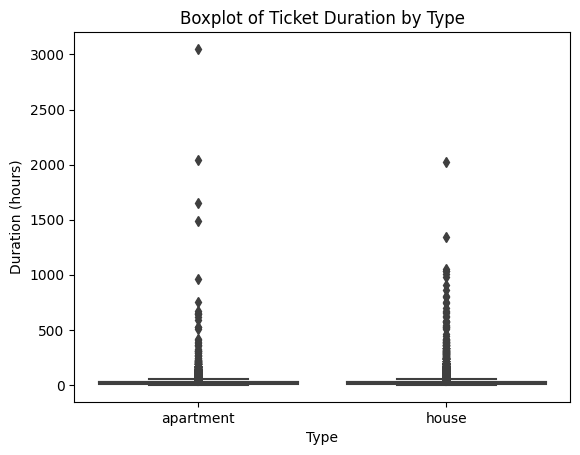

In [21]:
# Boxplot of ticket duration by type: This can give you a sense of the distribution and any potential outliers in ticket duration for houses and apartments.

sns.boxplot(x='Type', y='Ticket Duration (hours)', data=df)
plt.title('Boxplot of Ticket Duration by Type')
plt.xlabel('Type')
plt.ylabel('Duration (hours)')
plt.show()


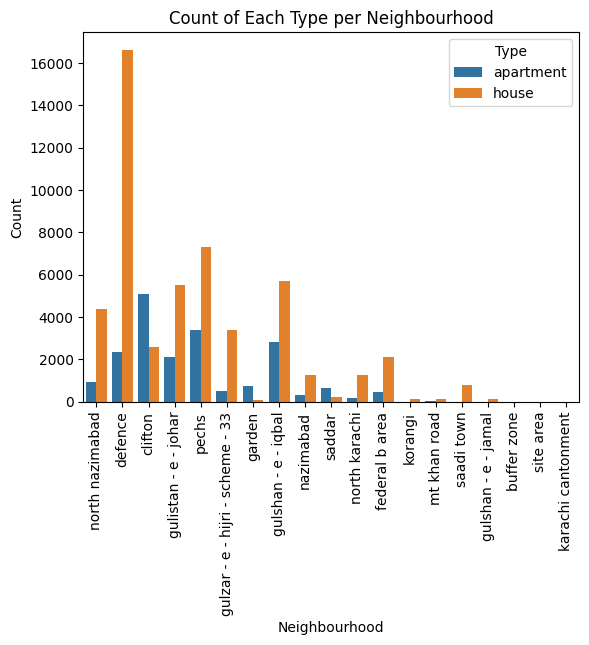

In [24]:
# Count of each type (house or apartment) per neighbourhood: This can show you the distribution of houses and apartments per neighbourhood.

sns.countplot(x='Neighbourhood', hue='Type', data=df)
plt.title('Count of Each Type per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Analysis of 48 hour resolution time exceedance


In [25]:
df['Exceeded'] = df['Ticket Duration (hours)'] > 48

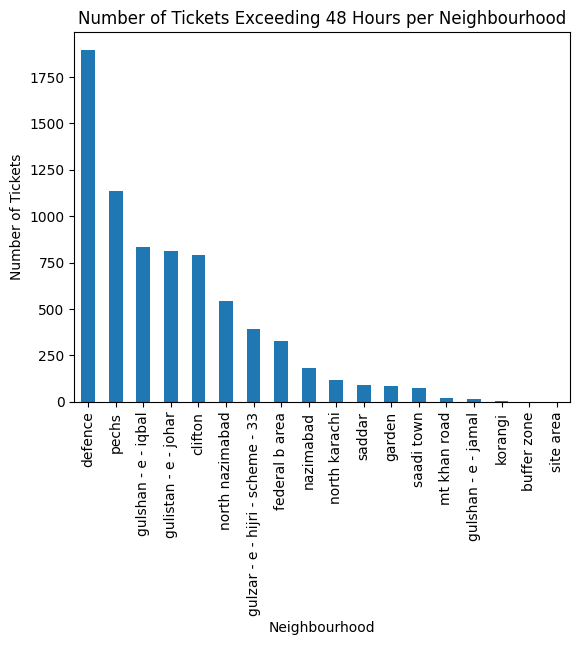

In [26]:
# Number of tickets that exceeded the standard resolution time per neighbourhood:

df[df['Exceeded'] == True]['Neighbourhood'].value_counts().plot(kind='bar')
plt.title('Number of Tickets Exceeding 48 Hours per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Tickets')
plt.show()


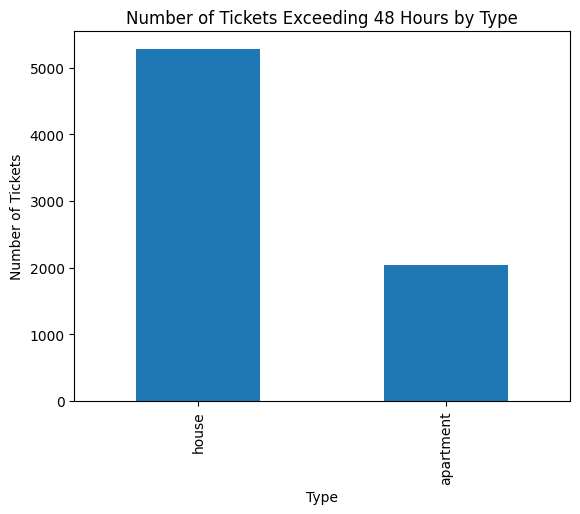

In [27]:
# Number of tickets that exceeded the standard resolution time by type (house or apartment):

df[df['Exceeded'] == True]['Type'].value_counts().plot(kind='bar')
plt.title('Number of Tickets Exceeding 48 Hours by Type')
plt.xlabel('Type')
plt.ylabel('Number of Tickets')
plt.show()


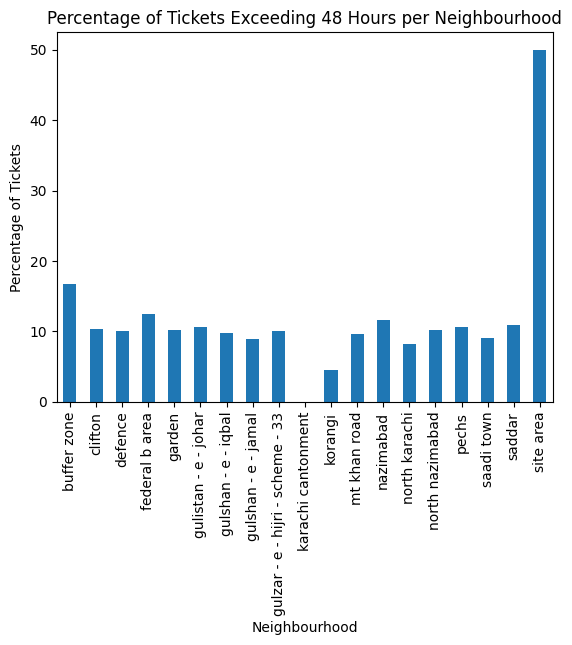

In [30]:
# Percentage of tickets that exceeded the standard resolution time per neighbourhood:

(df[df['Exceeded'] == True]['Neighbourhood'].value_counts() / df['Neighbourhood'].value_counts() *100).plot(kind='bar')
plt.title('Percentage of Tickets Exceeding 48 Hours per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Percentage of Tickets')
plt.show()


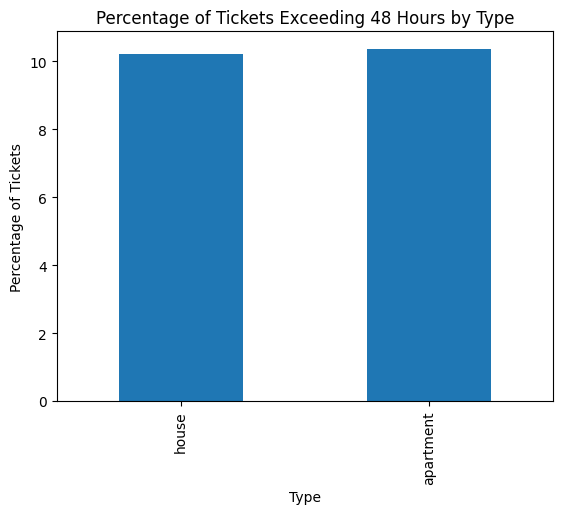

In [31]:
# Percentage of tickets that exceeded the standard resolution time by type (house or apartment):

(df[df['Exceeded'] == True]['Type'].value_counts() / df['Type'].value_counts() *100).plot(kind='bar')
plt.title('Percentage of Tickets Exceeding 48 Hours by Type')
plt.xlabel('Type')
plt.ylabel('Percentage of Tickets')
plt.show()


## Month Wise Analysis

In [33]:
df_ticket_data['Created'] = pd.to_datetime(df_ticket_data['Created'])
df['Ticket Month'] = df_ticket_data['Created'].dt.month_name()

df.head()

,Ticket #,Type,House #,Apartment #,Building #,Building Name,Street,Road,Area & Sub Area,Neighbourhood,City,Ticket Duration (hours),Exceeded,Ticket Month
0,105207394681,apartment,house # sc - 4,flat # 107 1st floor,NaN,al kareem centre,faizan street,NaN,block d,north nazimabad,karachi,122.830278,True,December
1,109247984771,apartment,house # plot # 28 - c,flat a - 2 1st floor,NaN,NaN,lane 9,khayaban e sehar,phase 6,defence,karachi,8.279722,False,January
2,101042042052,apartment,NaN,apartment / suite # flat 204,building all blocks,pardesi green land apartments,8th street,NaN,bath island,clifton,karachi,19.714722,False,January
3,101087613080,apartment,NaN,apartment / suite # bi3,building all blocks,ibrahim terrace,NaN,adam road,civil lines,clifton,karachi,21.246389,False,December
4,107178824611,apartment,NaN,apartment / suite # 26,building block b,marhaba galaxy,NaN,akhtar masood road,block m,north nazimabad,karachi,22.580278,False,December


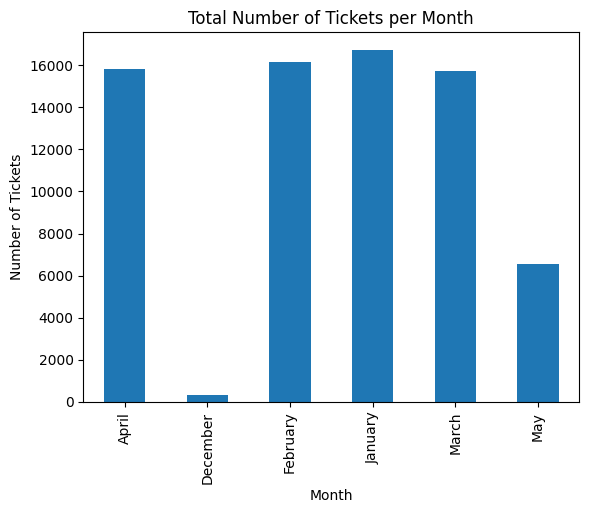

In [35]:
# Total number of tickets per month:

df['Ticket Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Total Number of Tickets per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.show()


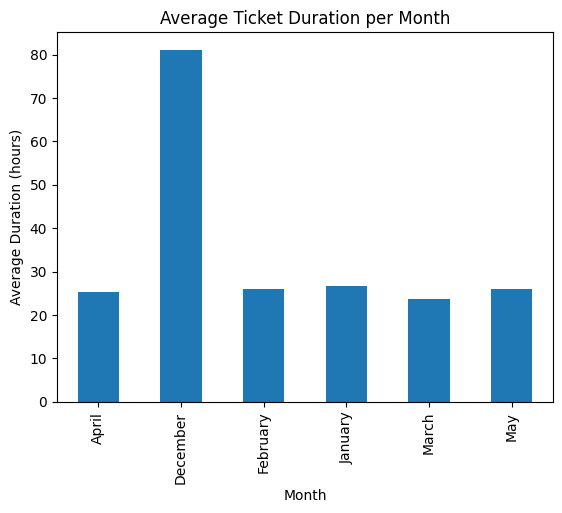

In [36]:
# Average ticket duration per month:

df.groupby('Ticket Month')['Ticket Duration (hours)'].mean().sort_index().plot(kind='bar')
plt.title('Average Ticket Duration per Month')
plt.xlabel('Month')
plt.ylabel('Average Duration (hours)')
plt.show()


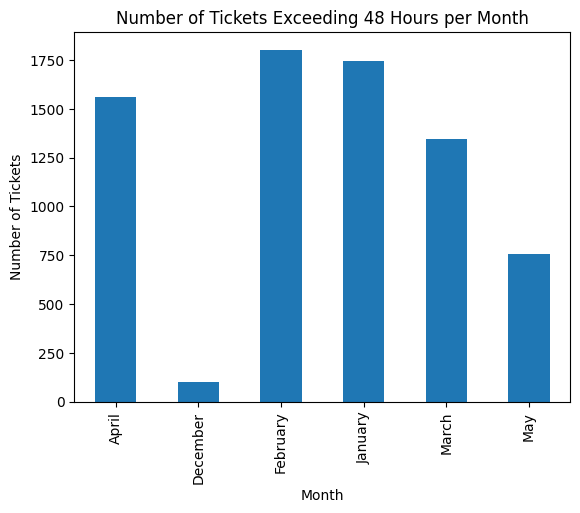

In [37]:
# Number of tickets that exceeded the standard resolution time per month:

df[df['Exceeded'] == True]['Ticket Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Tickets Exceeding 48 Hours per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.show()


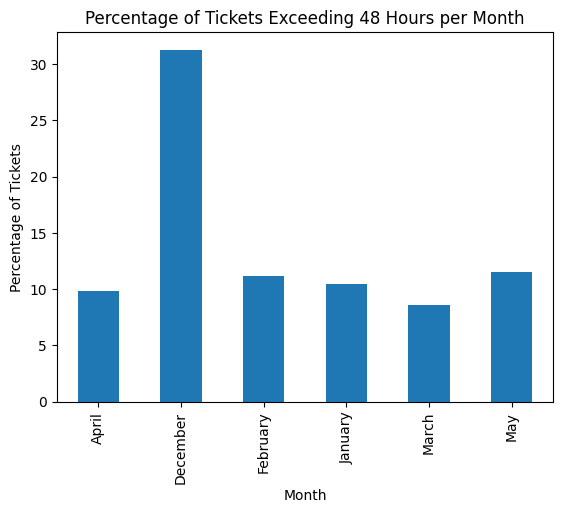

In [38]:
# Percentage of tickets that exceeded the standard resolution time per month:

(df[df['Exceeded'] == True]['Ticket Month'].value_counts() / df['Ticket Month'].value_counts() *100).sort_index().plot(kind='bar')
plt.title('Percentage of Tickets Exceeding 48 Hours per Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Tickets')
plt.show()
